## <center>Linear and Quadrtic Discriminant Analysis (LDA and QDA)- Classification</center>

To better understand the classification power of the linear and quadratic discriminant analysis methods, in this workbook the Smarket data set will be analized. Besides the discriminant techniques, logistic and kNN classifications will also be performed.

### Data

The Smarket data set from the ISLR library consists of the percentage returns for the S&P 500 stock index over 1,250 days, from the beginning of 2001 until the end of 2005. For each date, there are the following pieces of information:

- Lag1 through Lag5: the percentage returns for each of the five previous trading days
- Volume: the number of shares traded on the previous day, in billions
- Today: the percentage return on the date in question
- Direction: whether the market was Up (positive percentage return) or Down (negative percentage return) on this date.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix, classification_report

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Smarket.csv")
df.drop(columns="Unnamed: 0", inplace=True)
df.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


In [3]:
df.shape

(1250, 9)

In [4]:
df.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.00000,1250.000000,1250.000000
mean,2003.016000,0.003834,0.003919,0.001716,0.001636,0.00561,1.478305,0.003138
std,1.409018,1.136299,1.136280,1.138703,1.138774,1.14755,0.360357,1.136334
min,2001.000000,-4.922000,-4.922000,-4.922000,-4.922000,-4.92200,0.356070,-4.922000
25%,2002.000000,-0.639500,-0.639500,-0.640000,-0.640000,-0.64000,1.257400,-0.639500
50%,2003.000000,0.039000,0.039000,0.038500,0.038500,0.03850,1.422950,0.038500
75%,2004.000000,0.596750,0.596750,0.596750,0.596750,0.59700,1.641675,0.596750
max,2005.000000,5.733000,5.733000,5.733000,5.733000,5.73300,3.152470,5.733000


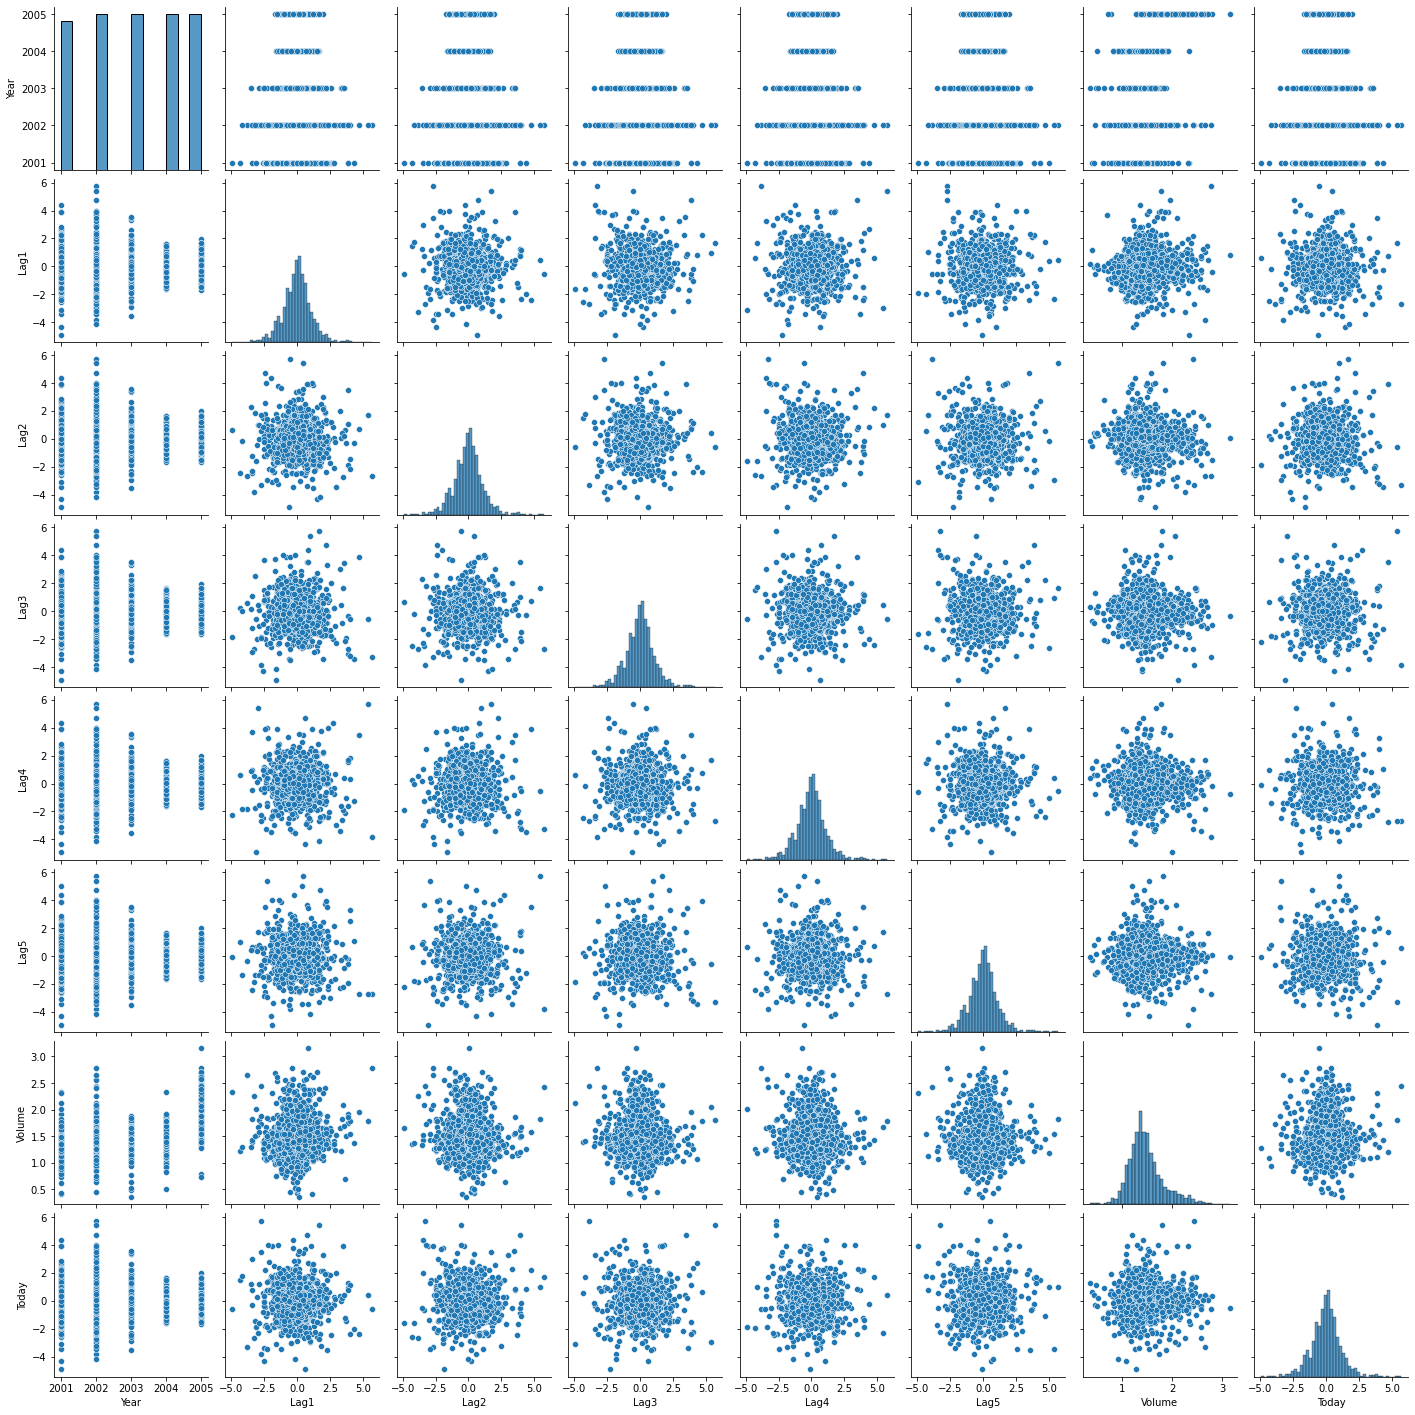

In [5]:
sns.pairplot(df);

From the data it can be seen that all the categories/instances present a pseudo-normal distribution, except of year.

In [6]:
df.corr()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,0.029700,0.030596,0.033195,0.035689,0.029788,0.539006,0.030095
Lag1,0.029700,1.000000,-0.026294,-0.010803,-0.002986,-0.005675,0.040910,-0.026155
Lag2,0.030596,-0.026294,1.000000,-0.025897,-0.010854,-0.003558,-0.043383,-0.010250
Lag3,0.033195,-0.010803,-0.025897,1.000000,-0.024051,-0.018808,-0.041824,-0.002448
Lag4,0.035689,-0.002986,-0.010854,-0.024051,1.000000,-0.027084,-0.048414,-0.006900
Lag5,0.029788,-0.005675,-0.003558,-0.018808,-0.027084,1.000000,-0.022002,-0.034860
Volume,0.539006,0.040910,-0.043383,-0.041824,-0.048414,-0.022002,1.000000,0.014592
Today,0.030095,-0.026155,-0.010250,-0.002448,-0.006900,-0.034860,0.014592,1.000000


Looking at the last row, we see that the correlations between the lag variables and today's returns are close to zero, which means that there appears to be little correlation between today's returns and the returns from previous days. The only substantial correlation is between Year and Volume, with a value of 0.539. We can plot the data to see that Volume is increasing over time. In other words, the average number of shares traded daily increased from 2001 to 2005.

Text(0, 0.5, 'Shares traded (billions)')

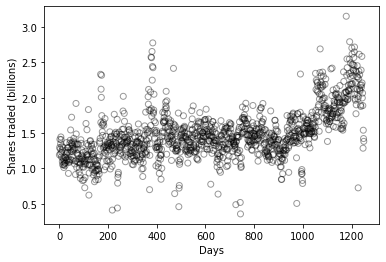

In [7]:
days = np.arange(1, 1251, 1)

plt.scatter(days, df["Volume"], facecolors='none', edgecolors='black', alpha=0.4)
plt.xlabel("Days")
plt.ylabel("Shares traded (billions)")

### Regression models

For the regression models, the instances Lag1-Lag5 and Volumne will be used to predict the instance Direction

In [8]:
X = df.drop(columns=["Year", "Today", "Direction"])
y = df["Direction"]

In [9]:
def model_out(m, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    m.fit(X_train, y_train)
    y_pred = m.predict(X_test)

    plot_confusion_matrix(m, X_test, y_test)
    print(classification_report(y_test,y_pred))


#### Logistic Regression

              precision    recall  f1-score   support

        Down       0.53      0.15      0.24       132
          Up       0.47      0.85      0.61       118

    accuracy                           0.48       250
   macro avg       0.50      0.50      0.42       250
weighted avg       0.50      0.48      0.41       250



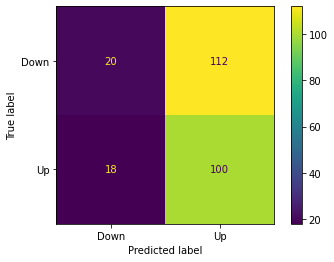

In [10]:
logreg = LogisticRegression()

model_out(logreg, X, y)

In [11]:
logreg.coef_

array([[-0.09235309, -0.05608986,  0.03706322,  0.02099291,  0.00560924,
         0.09980736]])

#### LDA

              precision    recall  f1-score   support

        Down       0.53      0.15      0.24       132
          Up       0.47      0.85      0.61       118

    accuracy                           0.48       250
   macro avg       0.50      0.50      0.42       250
weighted avg       0.50      0.48      0.41       250



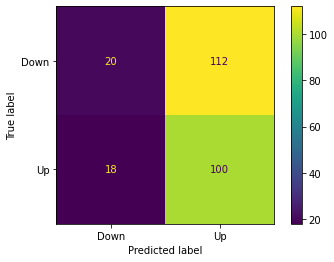

In [12]:
lda = LinearDiscriminantAnalysis()
model_out(lda, X, y)

In [13]:
lda.priors_

array([0.47, 0.53])

First, we note that the LDA output indicates that the estimated prior probabilities of the groups are  $\pi_1$=0.47  and  $\pi_2$=0.53 . This means that 47% of the training observations correspond to days during which the market went down and 53% of the training observations correspond to days during which the market went up.

In [14]:
lda.means_

array([[ 8.34872340e-02,  5.40680851e-02,  9.47659574e-03,
        -1.84255319e-03, -2.83829787e-03,  1.47728628e+00],
       [-2.97094340e-02, -1.78283019e-02,  5.84924528e-02,
         2.73245283e-02,  1.43584906e-03,  1.48890692e+00]])

In addition, the output also provides the averages of each predictor within each class (e.g. the average value of Lag1 for days in which the market went down is 0.0834), which are used in LDA as estimates of the actual group means $\mu_k$. These suggest that there is a tendency for the previous two days' returns to be negative on the days when the market increases, and a tendency for the previous two days' returns to be positive on the days when the market decreases.

In [15]:
lda.coef_

array([[-0.09225611, -0.05597435,  0.03720153,  0.02097531,  0.00569372,
         0.10266006]])

Lastly, the coefficients of linear discriminants portion of the output provides the linear combination of Lag1 and Lag2 that are used to form the LDA decision rule. In other words, you can intuitively think that these are the multipliers of the elements of  X=x  in the formula

$$\delta _k(x)  = x^T \Sigma^ {−1} \mu _k − \frac{1}{2} \mu^T _k \Sigma^{−1} \mu _k + log(\pi _k)$$
 
However, it is important to note that the values given by lda() are not the actual multipliers of the elements of  X=x  in the above formula, as they are normalized so that the within groups covariance is spherical. Instead they are scaled coefficients which are discussed more in detail in this stats.stackexchange post.

Recall that in the fomula $\Sigma$  is the  2×2  covariance matrix of Lag1 and Lag2;  $\mu_k$  is the vector of the group means of Lag1 and Lag2 for either the group Down or the group Up;  $\pi_k$  is the estimated prior probability of either Down or Up. Strictly speaking, since we are using estimates in the model,  $\Sigma$,  $\mu_k$ , and  $\pi_k$  should be replaced with their hatted versions. Also recall that this formula is the vector/matrix version of

$$\delta_k(x) = x \frac{\mu_k}{\sigma^2} -\frac{\mu_k^2}{2\sigma^2} + log(\pi_k)$$
 
More concretely, if $\delta_k(x)$  is large, then the LDA classifier will predict a market increase; if it is small, then the LDA classifier will predict a market decline.

#### QDA

              precision    recall  f1-score   support

        Down       0.49      0.22      0.30       132
          Up       0.46      0.75      0.57       118

    accuracy                           0.47       250
   macro avg       0.48      0.48      0.44       250
weighted avg       0.48      0.47      0.43       250



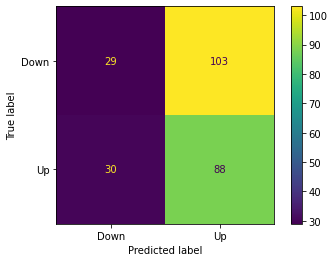

In [16]:
qda = QuadraticDiscriminantAnalysis()
model_out(qda, X, y)

In [17]:
qda.priors_

array([0.47, 0.53])

In [18]:
qda.means_

array([[ 8.34872340e-02,  5.40680851e-02,  9.47659574e-03,
        -1.84255319e-03, -2.83829787e-03,  1.47728628e+00],
       [-2.97094340e-02, -1.78283019e-02,  5.84924528e-02,
         2.73245283e-02,  1.43584906e-03,  1.48890692e+00]])

While the output for the result of qda() is similar to that as lda() in that it includes the prior probabilities of the groups as well as the group means, it does not contain the coefficients of the linear discriminants. This is because the QDA classifier involves a quadratic, not linear, function of the predictors.

#### KNN

              precision    recall  f1-score   support

        Down       0.55      0.60      0.57       132
          Up       0.50      0.46      0.48       118

    accuracy                           0.53       250
   macro avg       0.53      0.53      0.53       250
weighted avg       0.53      0.53      0.53       250



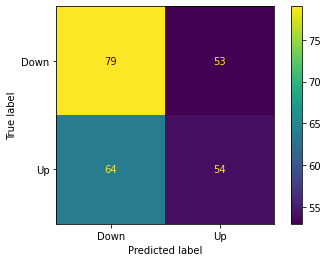

In [19]:
knn = KNeighborsClassifier(n_neighbors=10)
model_out(knn, X, y)